**Student name:** Harish Singh <br>
**BITS ID:** 2023HB21209 <br>
**Course name:** MBA in Business Analytics <br>
**Supervisor's name:** Nandish S Amdanimath <br>
**Additional Examiner's name:** Vinay Joel Dmonte <br>
**BITS Faculty Mentor:** Pramukh Nanjundaswamy Vasist 

<h1 align="center"><b>Infrastructure Modernization Recommendation System for Dell ISG Customers</b></h1>
<hr>

# Project Description: 

The following recommendation engine automates infrastructure modernization assessment for Dell ISG customers factoring Dell’s entire suite of technology offerings customized across: Compute, Storage, Data Protection, Networking, Hyperconverged Infrastructure, Cloud and Multi-cloud integration and Edge Solutions.

This dissertation entails building a fully functional recommendation platform focused on enterprise and commercial Dell customers.

# Part I: Data Acquisition & Exploratory Data Analysis (EDA)

## **Step 1:** Load the dataset

**Task:** The initial step involves loading the **'Customer_Profile_RSE_Dataset.csv'** file into a pandas DataFrame, establishing the foundation for all subsequent data manipulation and analysis.

In [1]:
# !pip3 install pandas

In [2]:
import pandas as pd

df = pd.read_csv('/Users/kaverisingh/Downloads/Customer_Profile_RSE_Dataset.csv')

## **Step 2:** Display the data head, dataset structure and data types

**Task:** The primary action here is using the *.head()* and *.info()* methods to inspect the dataset.
**Insight:** This confirms that the dataset consists of 2504 entries and that all 21 columns, including both features and targets, were imported as the generic object type (strings/categorical data). This immediately signals the necessity of encoding all variables before model training.

In [3]:
display(df.head())

,Environment_Type,Vertical/Industry,Company_Size,Hypervisor_Type,Storage_Type,Current_IT_Environment,Existing_Compute_Vendor,Existing_Switch_Vendor,Existing_Storage_Vendor,Current_Access_Protocol,...,Current_Backup_Type,Current_Backup_Software,Existing_Cloud_Provider,AI_Readiness,Dell_Recommended_Server_Model,Dell_Recommended_Networking_Solution,Dell_Recommended_Storage_Product,Dell_Recommended_HCI_Solution,Dell_Recommended_Data_Protection_Solution,Cloud_UseCase_to_APEX_Mapping
0,Greenfield,Retail,SMB,NaN,Cloud native,Cloud native Scalable S3 Environments,NaN,NaN,NaN,multiprotocol,...,NaN,NaN,AWS,"Moderate, HPC",NaN,NaN,NaN,NaN,NaN,Dell APEX Object Storage
1,Brownfield,Healthcare,Mid,NaN,Unified,Business Critical Modern Environment,Supermicro,Cisco,IBM,FC/iSCSI/NFS/NVMe,...,Full,Druva,NaN,"Moderate, HPC",Dell PowerEdge R Series,Dell PowerSwitch S Series,Dell PowerStore,NaN,Dell PowerProtect Data Domain,NaN
2,Brownfield,Media,Mid,NaN,File,Active Archive NAS Environment,QNAP,Juniper,EMC,NFS,...,Differential,Veeam,NaN,"Moderate, HPC",Dell PowerEdge R Series,Dell PowerSwitch S Series,Dell PowerScale Archive series,NaN,Snapshots are taken locally by same Dell Stora...,NaN
3,Greenfield,Finance,Enterprise,Hyper-V,Block,Hybrid Azure Cloud Environment,NaN,NaN,NaN,FC/iSCSI,...,NaN,NaN,Azure,Not ready,NaN,NaN,NaN,Dell AX System for Azure Local,NaN,NaN
4,Brownfield,IT Services,Large,NaN,Object,S3 Environment,NaN,Dell,NaN,S3,...,Full,Druva,NaN,"Gen AI, HPC",Dell PowerEdge XE Series,Dell PowerSwitch Z Series,Dell ECS/ObjectScale,NaN,Dell PowerProtect Data Domain,NaN


In [4]:
# Get information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504 entries, 0 to 2503
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Environment_Type                           2504 non-null   object
 1   Vertical/Industry                          2504 non-null   object
 2   Company_Size                               2504 non-null   object
 3   Hypervisor_Type                            350 non-null    object
 4   Storage_Type                               2504 non-null   object
 5   Current_IT_Environment                     2504 non-null   object
 6   Existing_Compute_Vendor                    926 non-null    object
 7   Existing_Switch_Vendor                     1202 non-null   object
 8   Existing_Storage_Vendor                    562 non-null    object
 9   Current_Access_Protocol                    2504 non-null   object
 10  Data_Protection_Strategy_Type       

## **Step 3:** Check for missing values

**Task:** Missing values (NaN) were identified using the .isnull().sum() method.
**Insight:** Several key columns, particularly Hypervisor_Type, and the recommendation targets such as Dell_Recommended_Server_Model and Cloud_UseCase_to_APEX_Mapping, show a significant number of missing entries, requiring a consistent imputation strategy prior to modeling.

In [5]:
# Check for missing values and display the count for each column
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


Environment_Type                                0
Vertical/Industry                               0
Company_Size                                    0
Hypervisor_Type                              2154
Storage_Type                                    0
Current_IT_Environment                          0
Existing_Compute_Vendor                      1578
Existing_Switch_Vendor                       1302
Existing_Storage_Vendor                      1942
Current_Access_Protocol                         0
Data_Protection_Strategy_Type                   0
Current_Backup_Type                          1302
Current_Backup_Software                      1302
Existing_Cloud_Provider                      1971
AI_Readiness                                    0
Dell_Recommended_Server_Model                 832
Dell_Recommended_Networking_Solution          832
Dell_Recommended_Storage_Product              832
Dell_Recommended_HCI_Solution                2154
Dell_Recommended_Data_Protection_Solution     845


# Part II: Data Preprocessing & Splitting

# **Step 4-a:** Define Feature and Target Variables
 
**Task:** The dataset was separated into the feature matrix $X$ (based on 6 selected customer profile inputs) and the target matrix $Y$ (based on 6 Dell recommendation outputs).
**Missing Value Handling:** A critical preprocessing step was the imputation of all remaining missing values (NaN) in both the $X$ and $Y$ DataFrames by replacing them with the category 'Missing'.

In [6]:
# Feature and Target Definition

# Inputs (X) 
X_columns = [ 
    'Company_Size', 
    'Hypervisor_Type', 
    'Storage_Type', 
    'Current_IT_Environment', 
    'Data_Protection_Strategy_Type', 
    'AI_Readiness' 
] 
 
# Outputs (Y) 
Y_columns = [ 
    'Dell_Recommended_Server_Model', 
    'Dell_Recommended_Networking_Solution', 
    'Dell_Recommended_Storage_Product', 
    'Dell_Recommended_HCI_Solution', 
    'Dell_Recommended_Data_Protection_Solution', 
    'Cloud_UseCase_to_APEX_Mapping' 
] 
 
# Create DataFrames and impute categorical missing values consistently 
X = df[X_columns].copy() 
Y = df[Y_columns].copy() 
X.fillna('Missing', inplace=True) 
Y.fillna('Missing', inplace=True) 
 
# Optional: review targets 
print("\nTarget variables (Y columns):") 
print(Y.columns.tolist()) 


Target variables (Y columns):
['Dell_Recommended_Server_Model', 'Dell_Recommended_Networking_Solution', 'Dell_Recommended_Storage_Product', 'Dell_Recommended_HCI_Solution', 'Dell_Recommended_Data_Protection_Solution', 'Cloud_UseCase_to_APEX_Mapping']


## **Step 4-b:** Exploratory Distribution Checks (Visual) 

**Task:** Count plots were generated using Seaborn for categorical inputs like Company_Size, AI_Readiness, and Storage_Type.
**Purpose:** These visualizations confirm the distribution of classes within each feature, allowing analysts to spot any severe class imbalances that could bias the resulting model.

In [7]:
# !pip install seaborn

/var/folders/w1/f00skxms6yl137cw75pb2nzh0000gn/T/ipykernel_25668/4012598226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Company_Size', palette='viridis')


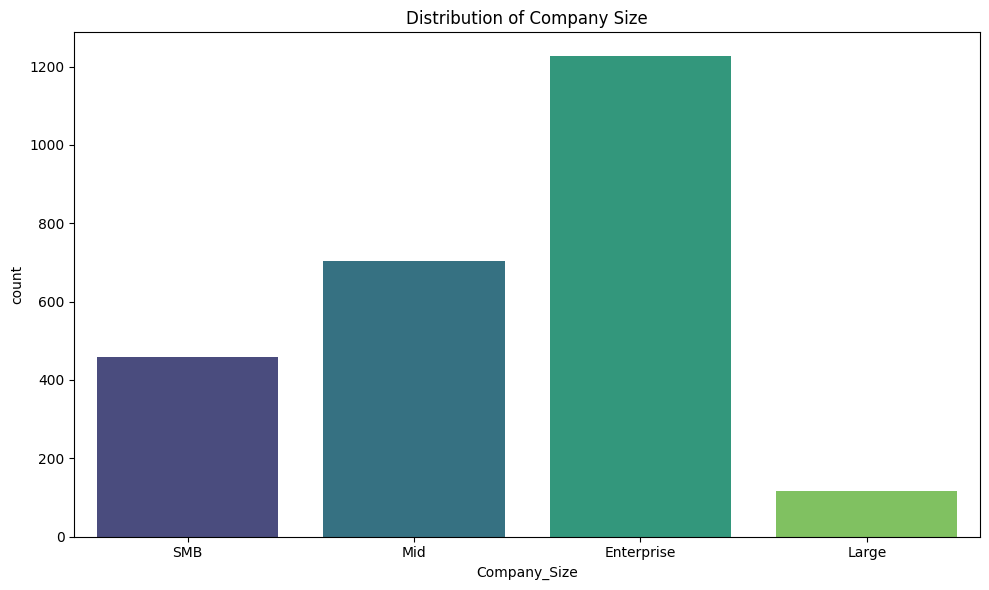

/var/folders/w1/f00skxms6yl137cw75pb2nzh0000gn/T/ipykernel_25668/4012598226.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AI_Readiness', palette='viridis')


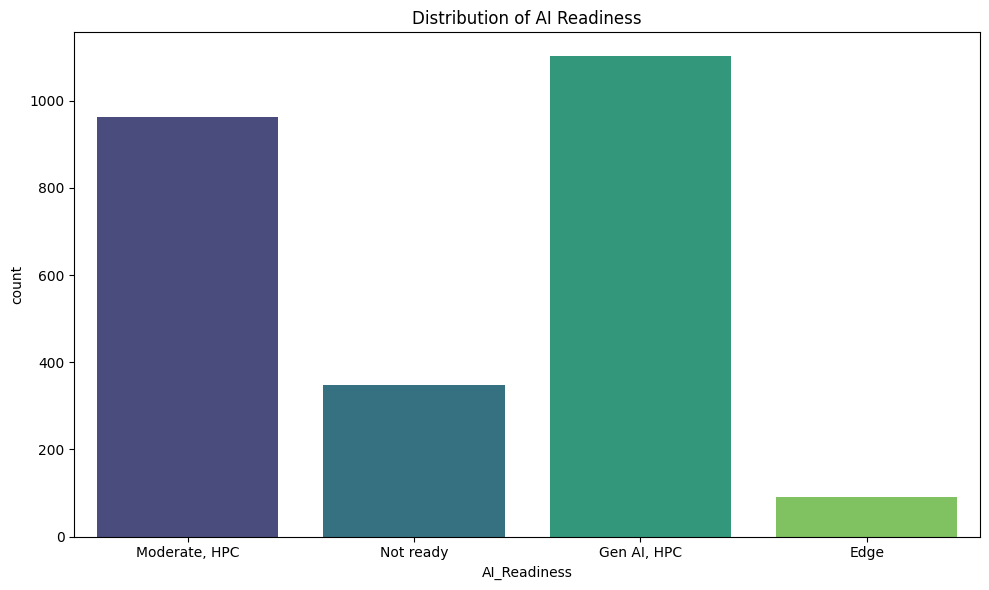

/var/folders/w1/f00skxms6yl137cw75pb2nzh0000gn/T/ipykernel_25668/4012598226.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Storage_Type', palette='viridis')


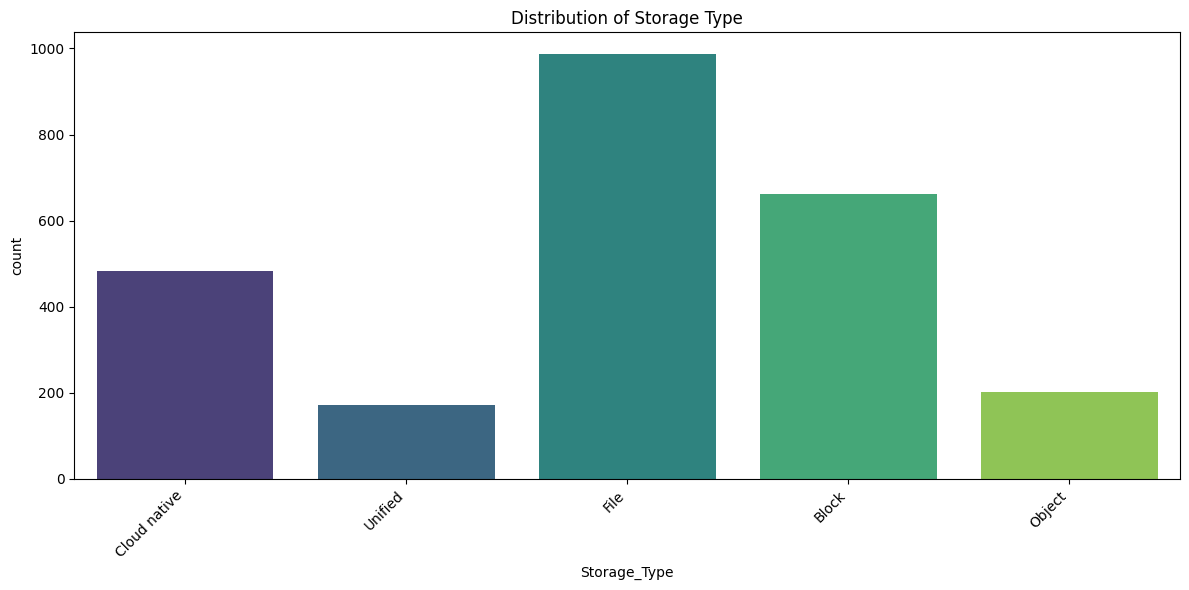

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Company size distribution 
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='Company_Size', palette='viridis') 
plt.title('Distribution of Company Size') 
plt.tight_layout() 
plt.show() 
 
# AI readiness distribution 
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='AI_Readiness', palette='viridis') 
plt.title('Distribution of AI Readiness') 
plt.tight_layout() 
plt.show() 
 
# Storage type distribution 
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='Storage_Type', palette='viridis') 
plt.title('Distribution of Storage Type') 
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show() 

## **Step 4-d:** Group-Wise Train-Test Split and Encoding

**Splitting Strategy:** The data was split (e.g., 80% train, 20% test) using *GroupShuffleSplit* based on the *Vertical/Industry* column.
**Key Insight:** This *group-wise split* ensures that the test set contains entire industry segments the model has **never seen** during training. This simulates a more rigorous, real-world scenario where the model must demonstrate true **generalization** beyond just permutations of known customer data.
**Encoding: One-Hot Encoding** was applied using *OneHotEncoder* and was explicitly **fitted only on the training set** ($X_{train}$) and then used to transform both the training and test sets. This prevents data leakage from the test set into the encoder's mapping.

In [9]:
# Group-Wise Train-Test Split by Vertical/Industry (Train-Only Encoding) 
# Brief: Hold out entire industries to simulate stronger presales generalization; fit encoder on TRAIN only and transform TEST. 

from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import GroupShuffleSplit 
 
# Group-wise split by Vertical/Industry (ensures truly unseen segments in test) 
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
groups = df['Vertical/Industry'].astype(str) 
train_idx, test_idx = next(gss.split(X, Y, groups=groups)) 
 
X_train_raw, X_test_raw = X.iloc[train_idx], X.iloc[test_idx] 
Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx] 
 
# Fit encoder on TRAIN only; transform TEST using the fitted encoder 
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) 
 
X_train = pd.DataFrame( 
    onehot_encoder.fit_transform(X_train_raw), 
    columns=onehot_encoder.get_feature_names_out(X_train_raw.columns) 
) 
X_test = pd.DataFrame( 
    onehot_encoder.transform(X_test_raw), 
    columns=onehot_encoder.get_feature_names_out(X_test_raw.columns) 
) 

# Part III: Modeling and Evaluation

## **Step 5:** Build and Train Multi-Output Classification Model 🧠

**Model Architecture:** A **MultiOutputClassifier** was employed, wrapping a **DecisionTreeClassifier** as its base estimator.
Task: The composite model was trained on the encoded training features ($X_{train}$) and the six target variables ($Y_{train}$) simultaneously.
Purpose: This establishes the machine learning pipeline's capability to predict all recommendation outputs from a single customer input vector.

In [10]:
# Baseline Multi-Output Model Training 
# Brief: Train a DecisionTree-based MultiOutputClassifier to predict all recommendation targets simultaneously. 

from sklearn.multioutput import MultiOutputClassifier 
from sklearn.tree import DecisionTreeClassifier 
 
base_classifier = DecisionTreeClassifier(random_state=42) 
multioutput_classifier = MultiOutputClassifier(base_classifier) 
multioutput_classifier.fit(X_train, Y_train) 
 
print("Multi-output classification model trained successfully.")

Multi-output classification model trained successfully.


## **Step 6:** Evaluate the Model 📈

**Task:** Predictions ($Y_{pred}$) were generated for the **unseen test set** ($X_{test}$).
**Metrics:** Evaluation included **Per-Output Accuracy, Overall Strict Accuracy** (requiring all 6 outputs to be correct), and **Hamming Loss** (the fraction of labels misclassified across all outputs).
**Insight:** The model reported **perfect accuracy (1.0000)** and a **Hamming Loss of 0.0000** for all outputs on the test set, suggesting an extremely strong, deterministic relationship between the input features and the six recommendation targets.

In [11]:
# Extended Evaluation Metrics (Pure Model Outputs) 
# Brief: Evaluate per-output accuracy, strict overall accuracy, Hamming loss, and per-output precision/recall/F1 before any business-rule overrides. 

from sklearn.metrics import accuracy_score, classification_report 
import numpy as np 
 
# Pure model predictions (do NOT apply business rules here) 
Y_pred = multioutput_classifier.predict(X_test) 
 
# Per-output accuracy 
output_accuracies = {col: accuracy_score(Y_test.iloc[:, i], Y_pred[:, i]) for i, col in enumerate(Y.columns)} 
print("\nAccuracy for each output:") 
for col, acc in output_accuracies.items(): 
    print(f"{col}: {acc:.4f}") 
 
# Strict overall accuracy (all outputs correct per sample) 
overall_accuracy = (Y_test.values == Y_pred).all(axis=1).mean() 
print(f"\nOverall accuracy : {overall_accuracy:.4f}") 
 
# Hamming loss (fraction of labels misclassified across all outputs) 
mismatch = (Y_test.values != Y_pred) 
hamming_loss_value = mismatch.mean() 
print(f"Hamming loss (multi-output): {hamming_loss_value:.4f}") 
 
# Per-output classification reports (precision/recall/F1) 
print("\nPer-output classification reports:") 
for i, col in enumerate(Y.columns): 
    print(f"\n=== {col} ===") 
    print(classification_report(Y_test.iloc[:, i], Y_pred[:, i], zero_division=0)) 


Accuracy for each output:
Dell_Recommended_Server_Model: 1.0000
Dell_Recommended_Networking_Solution: 1.0000
Dell_Recommended_Storage_Product: 1.0000
Dell_Recommended_HCI_Solution: 1.0000
Dell_Recommended_Data_Protection_Solution: 1.0000
Cloud_UseCase_to_APEX_Mapping: 1.0000

Overall accuracy : 1.0000
Hamming loss (multi-output): 0.0000

Per-output classification reports:

=== Dell_Recommended_Server_Model ===
                              precision    recall  f1-score   support

     Dell PowerEdge R Series       1.00      1.00      1.00       113
    Dell PowerEdge XE Series       1.00      1.00      1.00       305
    Dell PowerEdge XR Series       1.00      1.00      1.00        12
Dell PowerFlex Disaggregated       1.00      1.00      1.00         3
                     Missing       1.00      1.00      1.00       183

                    accuracy                           1.00       616
                   macro avg       1.00      1.00      1.00       616
                weighte

**Step 6-a: Visualize Confusion Matrices (Corrected)**
 
**Task:** Generate confusion matrices for each of the six recommendation outputs.
**Fixing Overlap:** To ensure a clean, professional visualization:
1. The layout was changed to a **single column** (n_cols=1) to eliminate horizontal overlap.
2. A custom **textwrap** function was implemented to wrap the long product names (category labels) over multiple lines, drastically reducing the required vertical space.
3. The **X-axis rotation was removed**, and the overall figure height was adjusted to clearly separate each matrix.

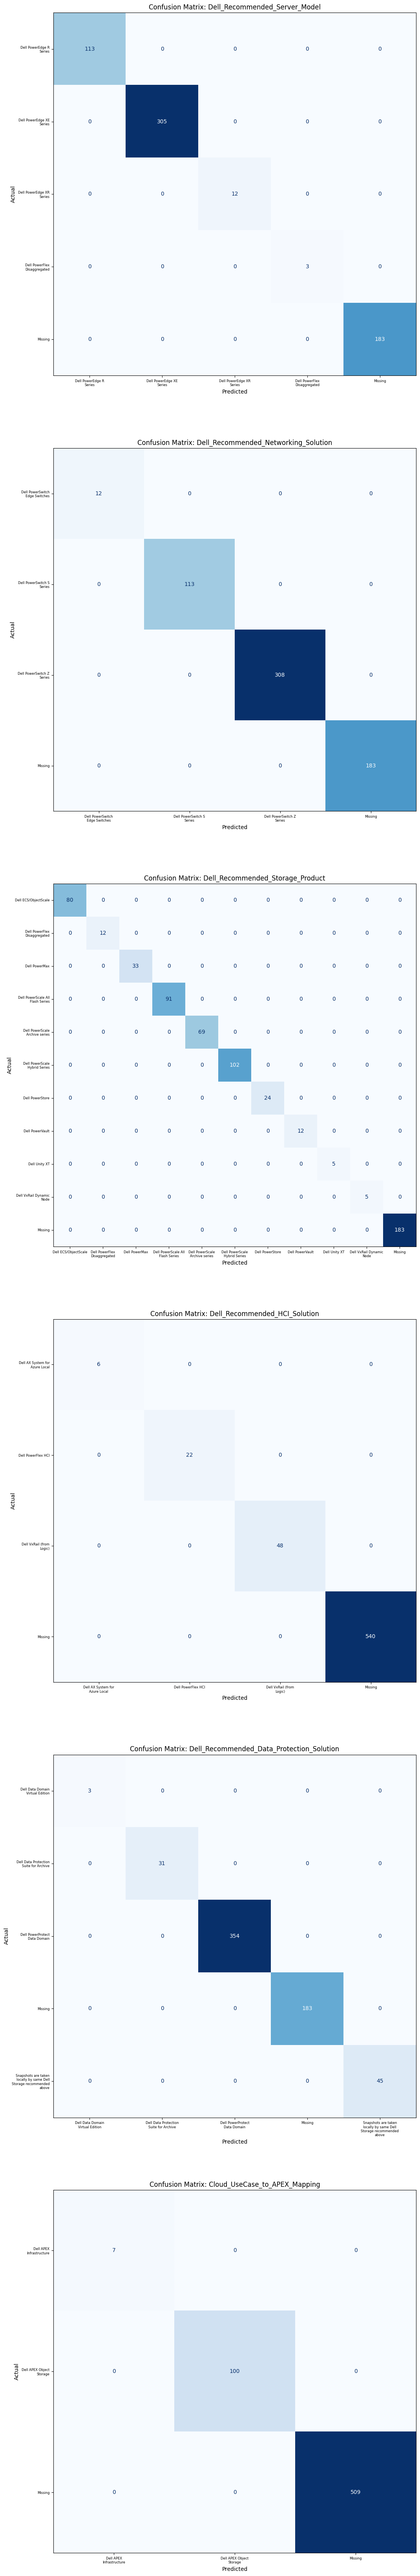

In [12]:
# Confusion Matrices per Output 
# Brief: Visualize where predictions are going wrong for each recommendation target. 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt
import numpy as np 
import textwrap # Import textwrap utility

# --- Utility function to wrap long labels ---
def wrap_labels(labels, width=15):
    """Wraps each label in the list to a specified character width."""
    return ['\n'.join(textwrap.wrap(l, width)) for l in labels]
# ---------------------------------------------


n_targets = len(Y.columns) 
# Using the single column layout for best results
n_cols = 1 
n_rows = n_targets 

# Adjusted figure size now that labels are vertical
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 14 * n_rows)) # Reduced height factor slightly
axes = axes.flatten() 

for i, col in enumerate(Y.columns): 
    y_true = Y_test.iloc[:, i] 
    y_pred = Y_pred[:, i] 

    labels = sorted(y_true.unique().tolist()) 
    cm = confusion_matrix(y_true, y_pred, labels=labels) 
    
    # *** KEY FIX: Wrap the display labels ***
    wrapped_labels = wrap_labels(labels, width=20) # Wrap labels to ~15 characters per line

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wrapped_labels) 
    
    # Plotting: NO XTICKS_ROTATION NEEDED!
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False) # Removed xticks_rotation=45
    
    # Set title font size
    axes[i].set_title(f'Confusion Matrix: {col}', fontsize=12) 
    
    # Set a reasonable font size for category labels
    axes[i].tick_params(axis='both', which='major', labelsize=6) 
    
    axes[i].set_xlabel('Predicted', fontsize=10) 
    axes[i].set_ylabel('Actual', fontsize=10) 


# --- Final Spacing Adjustment ---
# Since labels are wrapped and not rotated, hspace can be drastically reduced.
plt.subplots_adjust(hspace=0.2) 

plt.show()

# Part IV: Interactive Tool Logic

## **Step 7-a:** Define Input Preprocessing Function
 
**Task:** The *preprocess_input* function was defined to take raw customer inputs and transform them into the model's required format.
**Logic:** It uses the **same imputed 'Missing' logic** and the **previously fitted OneHotEncoder** to create a single-row DataFrame with the exact columns and encoding scheme used during training.

In [13]:
# Production-Compatible Input Preprocessing 

# Preprocess a single input dictionary to encoded DataFrame for prediction 
 
def preprocess_input(input_values): 
    """ 
    Preprocesses collected customer input to match the trained model's expected format. 
    """ 
    input_df = pd.DataFrame([input_values]) 
    input_df.fillna('Missing', inplace=True) 
 
    input_encoded = onehot_encoder.transform(input_df) 
    input_encoded_df = pd.DataFrame( 
        input_encoded, 
        columns=onehot_encoder.get_feature_names_out(input_df.columns) 
    ) 
    return input_encoded_df 
 
print("Preprocessing function defined successfully.") 

Preprocessing function defined successfully.


## **Step 7-b:** Define Business Rules Function
 
**Task:** The *apply_business_rules* function was created to apply **presales domain knowledge** to the raw ML predictions.
**Example Logic:** The rules are conditional, such as setting the *Dell_Recommended_HCI_Solution* to **'Dell AX System for Azure Local'** if the input specifies **'Hyper-V'**, or setting the data protection recommendation to **'Native Snapshot Support'** if the strategy is **'Snapshot'**. This ensures the final recommendation aligns with specific product-line mandates and sales strategies, often overriding the general-purpose ML prediction.

In [14]:
# Rule-Based Mapping Logic (Post-Prediction Business Rules) 

# This logic can be applied to the predictions_df (DataFrame of model outputs) 
 
def apply_business_rules(current_input_values, predictions_df): 
    selected_hypervisor = current_input_values.get('Hypervisor_Type') 
    selected_it_environment = current_input_values.get('Current_IT_Environment') 
    selected_storage_type = current_input_values.get('Storage_Type') 
    selected_ai_readiness = current_input_values.get('AI_Readiness') 
    selected_data_protection_strategy = current_input_values.get('Data_Protection_Strategy_Type') 
 
    # HCI mapping 
    if selected_hypervisor == 'Hyper-V': 
        predictions_df.loc[0, 'Dell_Recommended_HCI_Solution'] = 'Dell AX System for Azure Local' 
    elif selected_hypervisor == 'Multi-hypervisor': 
        predictions_df.loc[0, 'Dell_Recommended_HCI_Solution'] = 'Dell PowerFlex HCI' 
    elif selected_hypervisor == 'VMware': 
        if selected_it_environment == 'Business Critical VMWare Environment': 
            predictions_df.loc[0, 'Dell_Recommended_HCI_Solution'] = 'Dell VxRail P Series' 
        elif selected_it_environment == 'Entry level VMWare Environment': 
            predictions_df.loc[0, 'Dell_Recommended_HCI_Solution'] = 'Dell VxRail E Series' 
        elif selected_it_environment == 'Durable Edge VMWare Environment': 
            predictions_df.loc[0, 'Dell_Recommended_HCI_Solution'] = 'Dell VxRail D Series' 
        elif selected_it_environment == 'Visualization Graphics Intensive VMWare Environment': 
            predictions_df.loc[0, 'Dell_Recommended_HCI_Solution'] = 'Dell VxRail V Series' 
        elif selected_it_environment == 'Storage dense VMWare Environment': 
            predictions_df.loc[0, 'Dell_Recommended_HCI_Solution'] = 'Dell VxRail S Series' 
    elif selected_hypervisor == 'Non-HCI': 
        predictions_df.loc[0, 'Dell_Recommended_HCI_Solution'] = 'Non-HCI' 
 
    # Data Protection mapping 
    if selected_data_protection_strategy == 'Archive': 
        predictions_df.loc[0, 'Dell_Recommended_Data_Protection_Solution'] = 'Dell Data Protection Suite for Archive' 
    elif selected_data_protection_strategy == 'Backup': 
        predictions_df.loc[0, 'Dell_Recommended_Data_Protection_Solution'] = 'Dell PowerProtect Data Manager' 
    elif selected_data_protection_strategy == 'Snapshot': 
        predictions_df.loc[0, 'Dell_Recommended_Data_Protection_Solution'] = 'Native Snapshot Support' 
 
    # Cloud-native Non-HCI → APEX mapping 
    if selected_hypervisor == 'Non-HCI' and selected_storage_type == 'Cloud native': 
        if selected_it_environment == 'Cloud native Scalable S3 Environments': 
            predictions_df.loc[0, 'Cloud_UseCase_to_APEX_Mapping'] = 'Dell APEX Object Storage' 
        elif selected_it_environment == 'Scalable hybrid cloud Environment': 
            predictions_df.loc[0, 'Cloud_UseCase_to_APEX_Mapping'] = 'Dell APEX Cloud Platform' 
 
        # In cloud-centric scenarios, optional: set other columns to 'Missing' or 'Non-HCI' 
        # predictions_df.loc[0, 'Dell_Recommended_Server_Model'] = 'Missing' 
        # ... 
 
    # 3-tier storage examples 
    if selected_storage_type == 'Object' and selected_it_environment == 'S3 Environment' and not ( 
        selected_hypervisor == 'Non-HCI' and selected_storage_type == 'Cloud native'): 
        predictions_df.loc[0, 'Dell_Recommended_Storage_Product'] = 'Dell ECS/ObjectScale' 
 
    if selected_storage_type == 'Unified' and not ( 
        selected_hypervisor == 'Non-HCI' and selected_storage_type == 'Cloud native'): 
        if selected_it_environment == 'Business Critical Modern Environment': 
            predictions_df.loc[0, 'Dell_Recommended_Storage_Product'] = 'Dell PowerStore' 
        elif selected_it_environment == 'Balanced Performance Environments': 
            predictions_df.loc[0, 'Dell_Recommended_Storage_Product'] = 'Dell Unity XT' 
 
    # Server/networking examples by AI readiness 
    if selected_ai_readiness == 'Edge' and selected_storage_type in ['Block', 'Object', 'Unified', 'File']: 
        predictions_df.loc[0, 'Dell_Recommended_Server_Model'] = 'Dell PowerEdge XR Series' 
 
    if selected_ai_readiness == 'Moderate, HPC': 
        predictions_df.loc[0, 'Dell_Recommended_Server_Model'] = 'Dell PowerEdge R Series' 
        predictions_df.loc[0, 'Dell_Recommended_Networking_Solution'] = 'Dell PowerSwitch S Series' 
 
    # Cloud-native containerized → storage mapping 
    if selected_it_environment == 'Cloud native Containerized Environments': 
        predictions_df.loc[0, 'Dell_Recommended_Storage_Product'] = 'Dell PowerFlex Disaggregated' 
 
    return predictions_df 

## **Step 7-c:** Create Interactive Input Form

**Tool:** The *ipywidgets* library was used to build the interactive UI.
**Functionality:** The form uses *Dropdown widgets* for all six input features ($X$). Crucially, the form includes *dependency logic* where the options available in one dropdown *(e.g., Storage_Type or Current_IT_Environment)* dynamically update based on the selection in another *(e.g., Hypervisor_Type)*, streamlining the user experience.
**Final Workflow:** A 'Get Dell Recommendations' button orchestrates the final prediction: input validation $\rightarrow$ preprocessing $\rightarrow$ ML prediction $\rightarrow$ business rule application $\rightarrow$ scenario-focused output display.

In [15]:
# Interactive Prototype (Jupyter UI)
import ipywidgets as widgets 
from IPython.display import display

# Placeholder option for dropdowns 
placeholder_option = "Choose one option from below" 
 
# Build options from imputed X (replace/clean certain categories) 
input_options = {} 
for col in X.columns: 
    options = X[col].unique().tolist() 
    if col != 'Hypervisor_Type': 
        options = [opt for opt in options if opt != 'Missing'] 
    if col == 'Hypervisor_Type' and 'Missing' in options: 
        options[options.index('Missing')] = 'Non-HCI' 
    if col == 'AI_Readiness': 
        options = [opt for opt in options if opt != 'Not ready'] 
    options.insert(0, placeholder_option) 
    input_options[col] = options 
 
# Create widgets dict 
input_widgets = {} 
 
# Dependent dropdown updates 
 
def update_dependent_dropdowns(change): 
    selected_hypervisor = input_widgets['Hypervisor_Type'].value 
    selected_storage_type = input_widgets['Storage_Type'].value 
 
    # Storage_Type options conditioned on Hypervisor_Type 
    if selected_hypervisor in ['Hyper-V', 'Multi-hypervisor', 'VMware']: 
        storage_options = [placeholder_option, 'Block'] 
        input_widgets['Storage_Type'].options = storage_options 
        if input_widgets['Storage_Type'].value not in storage_options: 
            input_widgets['Storage_Type'].value = placeholder_option 
    else: 
        storage_options = [placeholder_option] + [opt for opt in input_options['Storage_Type'] if opt != placeholder_option] 
        input_widgets['Storage_Type'].options = storage_options 
        if input_widgets['Storage_Type'].value not in storage_options: 
            input_widgets['Storage_Type'].value = placeholder_option 
 
    # AI_Readiness needed only for Non-HCI (non-cloud-native) 
    if selected_hypervisor in ['Hyper-V', 'Multi-hypervisor', 'VMware'] or selected_storage_type == 'Cloud native': 
        ai_options = [placeholder_option] 
        input_widgets['AI_Readiness'].options = ai_options 
        input_widgets['AI_Readiness'].value = placeholder_option 
    else: 
        ai_options = [placeholder_option] + [opt for opt in input_options['AI_Readiness'] if opt != placeholder_option] 
        input_widgets['AI_Readiness'].options = ai_options 
        if input_widgets['AI_Readiness'].value not in ai_options: 
            input_widgets['AI_Readiness'].value = placeholder_option 
 
    # IT environment suggestions (base options + context rules) 
    it_env_options_base = [opt for opt in input_options['Current_IT_Environment'] if opt != placeholder_option] 
    it_env_options = [placeholder_option] + it_env_options_base 
    target_it_env_value = placeholder_option 
 
    if selected_hypervisor == 'Hyper-V': 
        it_env_options = [placeholder_option, 'Hybrid Azure Cloud Environment'] 
        target_it_env_value = 'Hybrid Azure Cloud Environment' 
    elif selected_hypervisor == 'Multi-hypervisor': 
        it_env_options = [placeholder_option, 'Cloud native Containerized Environments'] 
        target_it_env_value = 'Cloud native Containerized Environments' 
    elif selected_hypervisor == 'VMware': 
        it_env_options = [ 
            placeholder_option, 
            'Entry level VMWare Environment', 
            'Business Critical VMWare Environment', 
            'Durable Edge VMWare Environment', 
            'Visualization Graphics Intensive VMWare Environment', 
            'Storage dense VMWare Environment' 
        ] 
    elif selected_storage_type == 'Object': 
        it_env_options = [placeholder_option, 'S3 Environment'] 
    elif selected_storage_type == 'Unified': 
        it_env_options = [ 
            placeholder_option, 
            'Business Critical Modern Environment', 
            'Balanced Performance Environments' 
        ] 
    elif selected_storage_type == 'Block': 
        it_env_options = [ 
            placeholder_option, 
            'Entry level Environment', 
            'Mission Critical Environment', 
            'Cloud native Containerized Environments', 
            'Asymmetrical scaling VMWare Environment' 
        ] 
    elif selected_storage_type == 'File': 
        it_env_options = [ 
            placeholder_option, 
            'Active Archive NAS Environment', 
            'Hybrid NAS Environment', 
            'Extreme performance NAS Environment' 
        ] 
    elif selected_hypervisor == 'Non-HCI' and selected_storage_type == 'Cloud native': 
        it_env_options = [ 
            placeholder_option, 
            'Cloud native Scalable S3 Environments', 
            'Scalable hybrid cloud Environment' 
        ] 
 
    input_widgets['Current_IT_Environment'].options = it_env_options 
    if target_it_env_value in it_env_options and not ( 
        selected_hypervisor == 'Non-HCI' and selected_storage_type == 'Cloud native'): 
        input_widgets['Current_IT_Environment'].value = target_it_env_value 
    elif input_widgets['Current_IT_Environment'].value not in it_env_options: 
        input_widgets['Current_IT_Environment'].value = placeholder_option 
 
    # Data_Protection strategy not needed for cloud-native storage 
    if selected_storage_type == 'Cloud native': 
        dp_options = [placeholder_option] 
        input_widgets['Data_Protection_Strategy_Type'].options = dp_options 
        input_widgets['Data_Protection_Strategy_Type'].value = placeholder_option 
    else: 
        dp_options = [placeholder_option] + [opt for opt in input_options['Data_Protection_Strategy_Type'] if opt != placeholder_option] 
        input_widgets['Data_Protection_Strategy_Type'].options = dp_options 
        if input_widgets['Data_Protection_Strategy_Type'].value not in dp_options: 
            input_widgets['Data_Protection_Strategy_Type'].value = placeholder_option 
 
# Create a dropdown widget for each input column 
for col in X.columns: 
    dropdown = widgets.Dropdown( 
        options=input_options[col], 
        description=col + ':', 
        disabled=False, 
        value=placeholder_option, 
        layout=widgets.Layout(width='95%'), 
        style={'description_width': '200px'} 
    ) 
    input_widgets[col] = dropdown 
 
# Predict button and output area 
predict_button = widgets.Button(description="Get Dell Recommendations", layout=widgets.Layout(width='95%')) 
output_widget = widgets.Output() 
 
# Arrange widgets and display 
input_form = widgets.VBox(list(input_widgets.values()) + [predict_button, output_widget], layout=widgets.Layout(width='100%')) 
display(input_form) 
 
# Observe changes 
input_widgets['Hypervisor_Type'].observe(update_dependent_dropdowns, names='value') 
input_widgets['Storage_Type'].observe(update_dependent_dropdowns, names='value') 
 
# Prediction and display handler 
 
def on_predict_button_clicked(b): 
    with output_widget: 
        output_widget.clear_output() 
 
        # Collect current inputs 
        current_input_values = {col: widget.value for col, widget in input_widgets.items()} 
 
        # Validation: enforce required fields by scenario 
        required_fields = [] 
        for col in X_columns: 
            if col == 'AI_Readiness': 
                if current_input_values.get('Hypervisor_Type') == 'Non-HCI' and current_input_values.get('Storage_Type') != 'Cloud native': 
                    required_fields.append(col) 
            elif col == 'Data_Protection_Strategy_Type': 
                if current_input_values.get('Storage_Type') != 'Cloud native': 
                    required_fields.append(col) 
            else: 
                required_fields.append(col) 
 
        if any(current_input_values.get(col) == placeholder_option for col in required_fields): 
            print("\nPlease select an option for all required fields before getting recommendations.") 
            print("Required fields:", [col for col in required_fields if current_input_values.get(col) == placeholder_option]) 
            return 
 
        # Preprocess and predict 
        processed_input = preprocess_input(current_input_values) 
        predictions = multioutput_classifier.predict(processed_input) 
        predictions_df = pd.DataFrame(predictions, columns=Y.columns) 
 
        # Apply presales business rules 
        predictions_df = apply_business_rules(current_input_values, predictions_df) 
 
        # Scenario-focused display 
        selected_hypervisor = current_input_values.get('Hypervisor_Type') 
        selected_storage_type = current_input_values.get('Storage_Type') 
 
        is_hci_scenario = selected_hypervisor in ['Hyper-V', 'Multi-hypervisor', 'VMware'] 
        is_cloud_scenario = selected_hypervisor == 'Non-HCI' and selected_storage_type == 'Cloud native' 
        is_3tier_scenario = not is_hci_scenario and not is_cloud_scenario 
 
        print("\nDell Recommended Solutions:") 
        if is_cloud_scenario: 
            print(f"Cloud_UseCase_to_APEX_Mapping: {predictions_df['Cloud_UseCase_to_APEX_Mapping'].iloc[0]}") 
        elif is_hci_scenario: 
            print(f"Dell_Recommended_HCI_Solution: {predictions_df['Dell_Recommended_HCI_Solution'].iloc[0]}") 
            print(f"Dell_Recommended_Data_Protection_Solution: {predictions_df['Dell_Recommended_Data_Protection_Solution'].iloc[0]}") 
        elif is_3tier_scenario: 
            print(f"Dell_Recommended_Server_Model: {predictions_df['Dell_Recommended_Server_Model'].iloc[0]}") 
            print(f"Dell_Recommended_Networking_Solution: {predictions_df['Dell_Recommended_Networking_Solution'].iloc[0]}") 
            print(f"Dell_Recommended_Storage_Product: {predictions_df['Dell_Recommended_Storage_Product'].iloc[0]}") 
            print(f"Dell_Recommended_Data_Protection_Solution: {predictions_df['Dell_Recommended_Data_Protection_Solution'].iloc[0]}") 
        else: 
            # Default: show all targets, with friendly display for Non-HCI 
            for col in Y.columns: 
                display_value = predictions_df[col].iloc[0] 
                if col == 'Dell_Recommended_HCI_Solution' and display_value == 'Missing': 
                    display_value = 'Non-HCI' 
                print(f"{col}: {display_value}") 
 
# Wire up and initialize 
predict_button.on_click(on_predict_button_clicked) 
update_dependent_dropdowns({'new': None}) 